# Level 3:

## Task 1: Web Scraper

In [ ]:
## Task 1: Web Scraper

import csv
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
import pandas as pd



def is_social_media_url(url):
    social_media_domains = ['twitter.com','facebook.com','whatsapp.com','instagram.com']
    for domain in social_media_domains:
        if domain in url:
            return True
    return False

def extaract_all_links(url):
    try:
        # send a GET request to URL
        response = requests.get(url)

        #check if the request was sucessful(status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page.
            soup = BeautifulSoup(response.text,'html.parser')

            # Extract all links using BeautifulSoup Method
            links = [a['href'] for a in soup.find_all('a', href=True)]

            # Convert relative URLS to Absolute URLS.
            links = [urljoin(url, link) for link in links]

            return links
        else:
            print(f"Failed to retrive data from '{url}'. Status code: {response.status_code}")
            return []
    except requests.exceptions.RequestException as e:
        print(f"Error connecting to {url}: {e}")
        return [] 
    
def save_links_to_csv(links, csv_filename):
    with open(csv_filename,'w', newline= '') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['link'])   # Write Header.

        for link in links:
            csv_writer.writerow([link])

            
def extract_specific_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Skip extraction for social media URLs.
        if is_social_media_url(url):
            print(f"Skipping {url} because it's a social media link.")
            return None,None,None,None,None,None # Include the original link as None.
        
        heading_element = soup.find('h1',{'style': 'margin-bottom: 0.1rem;'})
        author_element = soup.find('h5',class_ = 'text-capitalize')
        publication_date_element = soup.find('div',class_ = 'updated-time')
        content_container = soup.find('div',class_ = 'subscribe--wrapperx')

        # Determine Category
        url_parts = urlparse(url).path.split('/') 
        category  = next((part for part in url_parts if part), 'Category not found')

        heading =  heading_element.text.strip() if heading_element else 'Heading not Found'
        author = author_element.text.strip() if author_element else 'Author not Found'
        publication_date_raw = publication_date_element.text.strip() if publication_date_element else 'Date not found'
        publication_date = publication_date_raw.replace('Published at :', '').strip()
        content = content_container.get_text(separator=' ', strip=True) if content_container else 'Content not found'

        return heading, author, publication_date, content, url, category
    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve content from {url}. Error: {e}")
        return None, None, None, None, url, None  # Include the original link and None for category
    
def save_to_csv(data, csv_file_path):
    with open(csv_file_path,'a', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Heading','Author','Publication_date','Source','Content','Link','Category']) # Updated Header.
        csv_writer.writerow(data)

def main():
    csv_file_path = 'kathmandu.csv'

    with open(csv_file_path,'w', newline='', encoding= 'utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Heading','Author','Publication_date','Source','Content','Link','Category']) 

    url = 'https://kathmandupost.com'
    links = extaract_all_links(url)

    #Save to CSV file
    csv_filename = 'data_links.csv'
    save_links_to_csv(links, csv_filename)

    #Print a message indicating sucess
    print(f"All links saved to {csv_filename}")

    link = pd.read_csv('data_links.csv')

    for url in links:
        if not urlparse(url).scheme:
            url = urljoin('https://', url)

        if urlparse(url).netloc and not is_social_media_url(url):
            heading, author, publication_date, content, link, category = extract_specific_content(url)
            if heading is not None and author is not None and content is not None:
                data_to_save = [heading, author, publication_date,'Kathmandu-Post',content, link, category]
                print(f"Date for {url}:\n Heading: {heading}\n Author: {author}\n Publication Date: {publication_date}\n Source: Kathmandu-Post\n Content: {content}\n Link: {link}\n Category: {category}\n")
                save_to_csv(data_to_save, csv_file_path)
                print(f"Data saved for {url}")
        else:
            print(f"Invalid URL format or socail media link: {url}")


if __name__=="__main__":
    main()



## Task 2: Data Visualization Tool

EDA and Visualizations for the Iris Dataset
Iris Dataset Loaded Successfully!

Dataset Overview:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical Summary:
        sepal_lengt

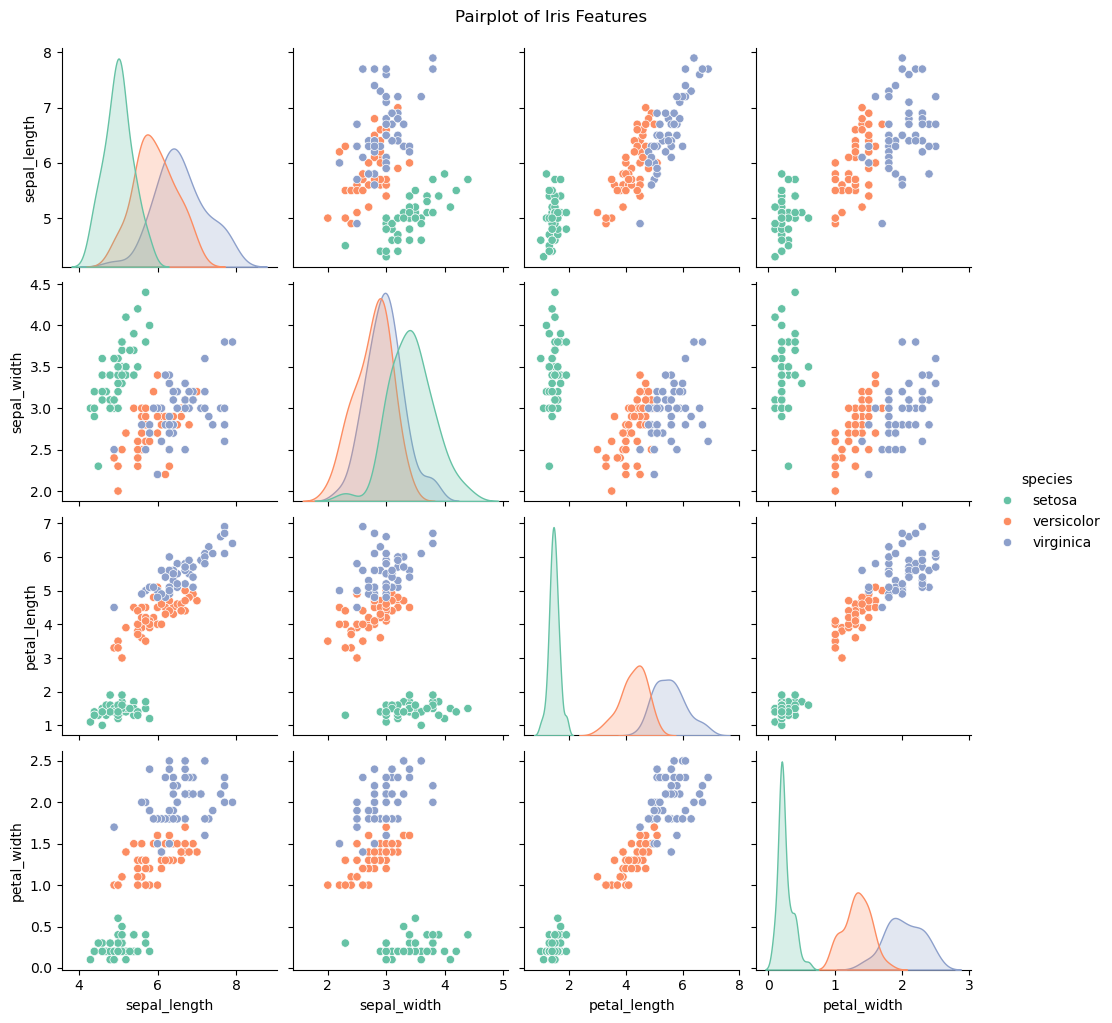

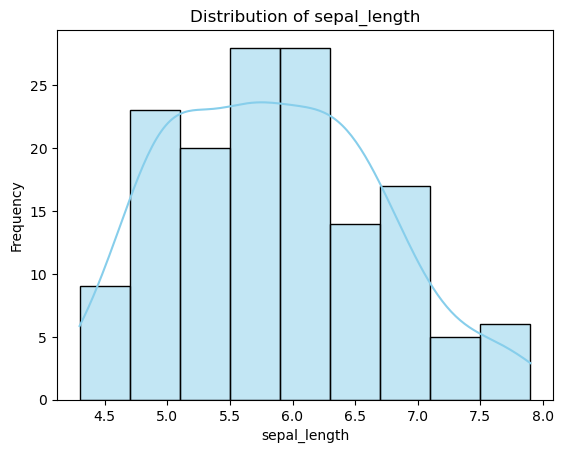

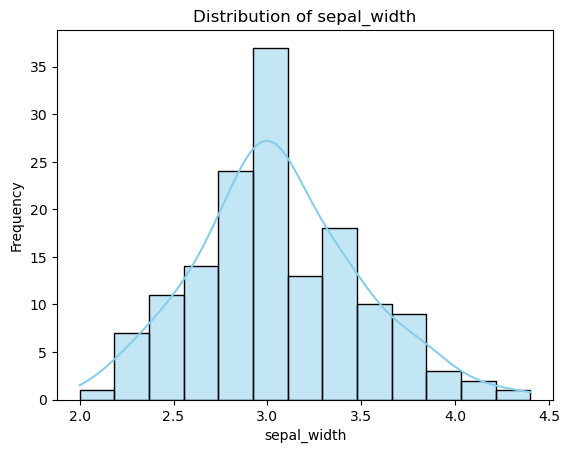

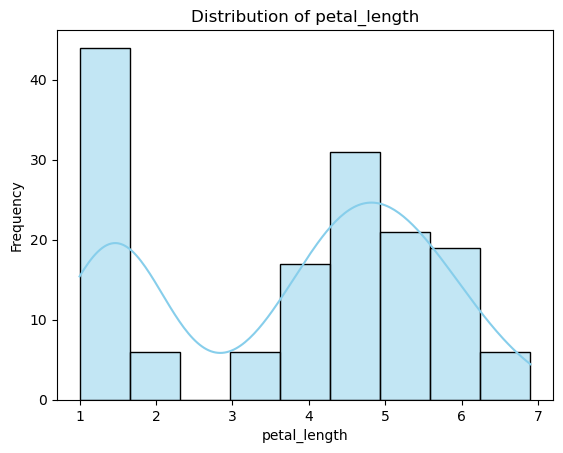

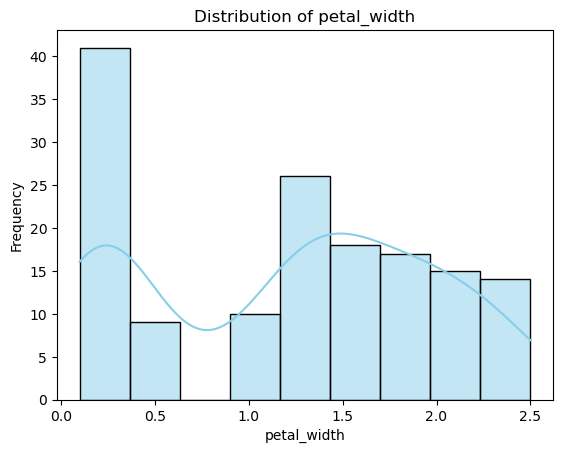

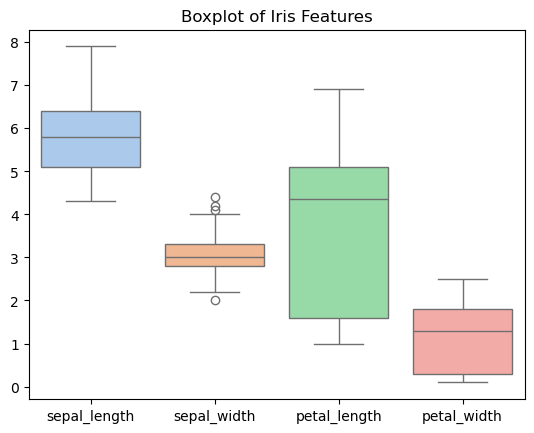

C:\Users\ranaa\AppData\Local\Temp\ipykernel_15968\299229979.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='species', y=column, palette='muted')


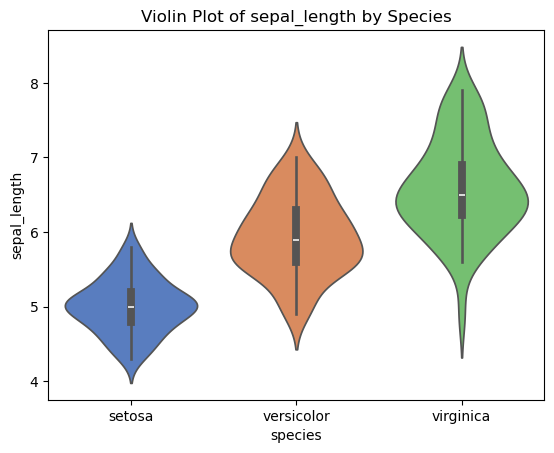

C:\Users\ranaa\AppData\Local\Temp\ipykernel_15968\299229979.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='species', y=column, palette='muted')


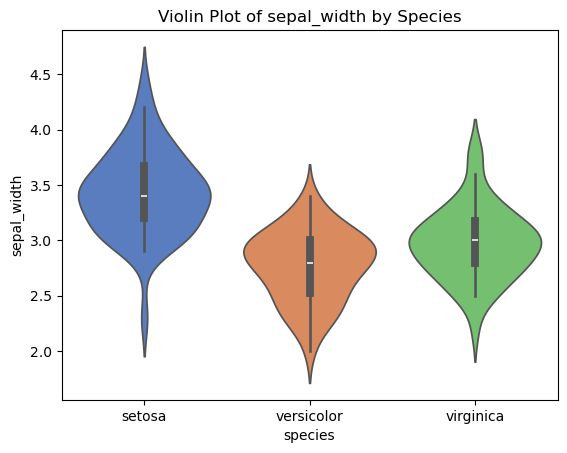

C:\Users\ranaa\AppData\Local\Temp\ipykernel_15968\299229979.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='species', y=column, palette='muted')


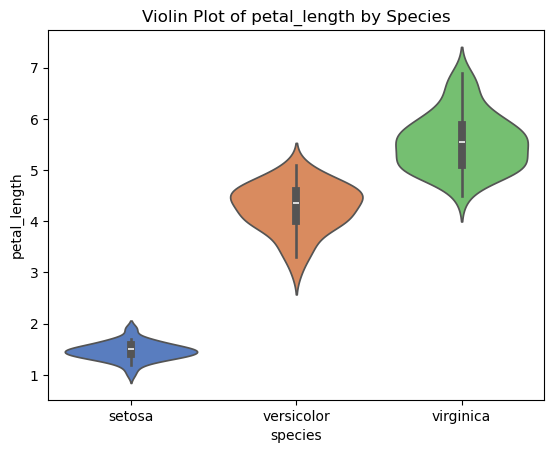

C:\Users\ranaa\AppData\Local\Temp\ipykernel_15968\299229979.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='species', y=column, palette='muted')


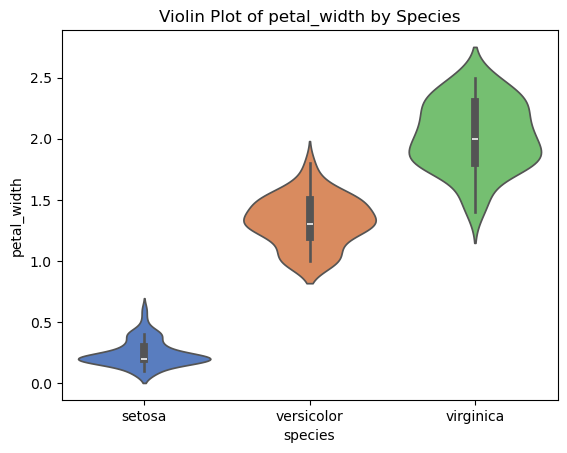

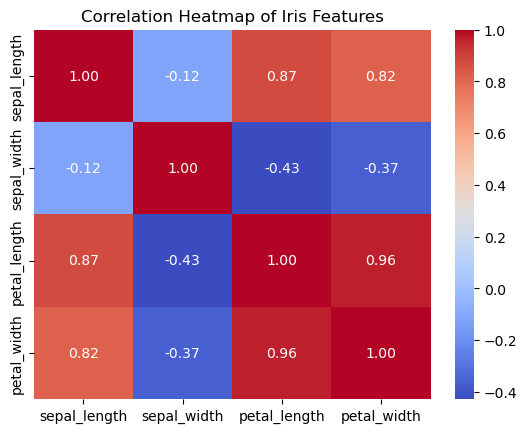

In [1]:
## Task 2: Data Visualization Tool

import seaborn as sns
import matplotlib.pyplot as plt

def load_iris_dataset():
    # Load the Iris dataset
    data = sns.load_dataset('iris')
    print("Iris Dataset Loaded Successfully!")
    print("\nDataset Overview:\n", data.head())
    print("\nDataset Info:")
    print(data.info())
    print("\nStatistical Summary:\n", data.describe())
    return data

def eda_visualizations(data):
    print("\nGenerating EDA Visualizations...")

    # Pairplot for overall feature distribution and species separation
    sns.pairplot(data, hue='species', palette='Set2', diag_kind='kde')
    plt.suptitle("Pairplot of Iris Features", y=1.02)
    plt.show()

    # Distribution of each feature
    for column in data.columns[:-1]:  # Exclude 'species'
        sns.histplot(data[column], kde=True, color='skyblue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    # Boxplot to detect outliers
    sns.boxplot(data=data.iloc[:, :-1], palette='pastel')
    plt.title("Boxplot of Iris Features")
    plt.show()

    # Violin plot for species-wise feature distribution
    for column in data.columns[:-1]:
        sns.violinplot(data=data, x='species', y=column, palette='muted')
        plt.title(f"Violin Plot of {column} by Species")
        plt.show()

    # Heatmap for correlation
    correlation_matrix = data.iloc[:, :-1].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of Iris Features")
    plt.show()

def main():
    print("EDA and Visualizations for the Iris Dataset")
    data = load_iris_dataset()
    eda_visualizations(data)

if __name__ == "__main__":
    main()


## Task 3: Automate a Task

In [ ]:
## Task 3: Automate a Task

# File Organizer

import os
import shutil

def organize_files_by_type(directory):
    # Define folders for each file type
    folders = {
        "PDF": [".pdf"],
        "Music": [".mp3", ".wav", ".aac"],
        "Videos": [".mp4", ".mkv", ".flv", ".avi"],
        "Images": [".jpg", ".jpeg", ".png", ".gif"],
        "Documents": [".doc", ".docx", ".xls", ".xlsx", ".ppt", ".pptx", ".txt"],
        "Archives": [".zip", ".rar", ".7z", ".tar"],
        "Others": []
    }

    # Ensure folders exist in the directory
    for folder in folders.keys():
        folder_path = os.path.join(directory, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

    # Organize files into respective folders
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if os.path.isfile(file_path):
            moved = False
            for folder, extensions in folders.items():
                if any(file.lower().endswith(ext) for ext in extensions):
                    shutil.move(file_path, os.path.join(directory, folder, file))
                    moved = True
                    break
            if not moved:  # If file type doesn't match, move to "Others"
                shutil.move(file_path, os.path.join(directory, "Others", file))

    print("Files have been organized successfully!")

# Example usage
directory = input("Enter the directory path to organize: ")
organize_files_by_type(directory)
